# Notebook showing construction of TS plots


I used the cosima cookbook in my analysis to extract data from the ACCESS-OM2-01 model.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy as scipy

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

from scipy import stats
import cosima_cookbook as cc
import gsw
#plt.rcParams['text.usetex'] = False
from xhistogram.xarray import histogram
import cmocean


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')

Loading the variables

In [4]:
expt = '01deg_jra55v13_ryf9091'
variable = 'salt'
darray = cc.querying.getvar(expt,variable, session,ncfile='ocean.nc', start_time='2059-01-01', end_time='2059-12-31', chunks={'st_ocean':None}).sel(time = slice('2059-01-01','2059-12-31'))
variable1 = 'temp'
darray1 = cc.querying.getvar(expt,variable1, session,ncfile='ocean.nc', start_time='2059-01-01', end_time='2059-12-31', chunks={'st_ocean':None}).sel(time = slice('2059-01-01','2059-12-31'))
variable2 = 'pot_rho_2'
darray2 = cc.querying.getvar(expt,variable2, session,ncfile='ocean.nc', start_time='2059-01-01', end_time='2059-12-31', chunks={'st_ocean':None}).sel(time = slice('2059-01-01','2059-12-31'))
variable3 = 'age_global'
darray3 = cc.querying.getvar(expt,variable3, session,ncfile='ocean.nc', start_time='2059-01-01', end_time='2059-12-31', chunks={'st_ocean':None}).sel(time = slice('2059-01-01','2059-12-31'))
variable4= 'dzt'
darray4 = cc.querying.getvar(expt,variable4, session,ncfile='ocean.nc', start_time='2059-01-01', end_time='2059-12-31', chunks={'st_ocean':None}).sel(time = slice('2059-01-01','2059-12-31'))
variable5= 'area_t'
darray5 = cc.querying.getvar(expt,variable5, session,n=1)
variable6= 'ht'
darray6 = cc.querying.getvar(expt,variable6, session,n=1)
variable7= 'dxt'
darray7 = cc.querying.getvar(expt,variable7, session,n=-1, ncfile = 'ocean_grid.nc')# ncfile = 'output675/ice/OUTPUT/iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))
variable8= 'dyt'
darray8 = cc.querying.getvar(expt,variable8, session,n=-1, ncfile = 'ocean_grid.nc')# ncfile = 'iceh.2069-12.nc', start_time='2059-01-01', end_time='2059-12-31').sel(time = slice('2059-01-01','2059-12-31'))
combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5, darray6, darray7, darray8])

#combined_array = xr.merge([darray, darray1, darray2, darray3, darray4, darray5])
combined_array

<xarray.Dataset>
Dimensions:     (st_ocean: 75, time: 12, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * st_ocean    (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * yt_ocean    (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * xt_ocean    (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * time        (time) object 2059-01-16 12:00:00 ... 2059-12-16 12:00:00
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
Data variables:
    salt        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    temp        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    pot_rho_2   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    age_global  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    dzt         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 2700, 3600), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(675, 900), meta=np.ndarray>

Loading the variables for the Ross Sea region and defining some useful variables.

In [5]:
section = combined_array.sel(xt_ocean=slice(-200,-175)).sel(yt_ocean=slice(-78,-67))#.load()#.sel(st_ocean =slice(200,6000))


#ORSI AND WIDERWOHL 
#section = combined_array.sel(xt_ocean=slice(-204,-153)).sel(yt_ocean=slice(-79,-70))

#section = combined_array.sel(xt_ocean=slice(74,78)).sel(yt_ocean=slice(-70,-65))
section = section.assign(volume = lambda section : section.dzt * section.area_t)
section = section.assign(x = lambda section : section.salt*0+section.xt_ocean)
section = section.assign(y = lambda section : section.salt*0+section.yt_ocean)
section = section.assign(z = lambda section : section.salt*0+section.st_ocean)
section = section.assign(ht1 = lambda section : section.dzt*section.ht/section.dzt)
section = section.assign(temp1 = lambda section : section.temp - 273.15)

#section = section.assign(ht1 = lambda section : section.ht1/section.dzt)

section



<xarray.Dataset>
Dimensions:     (st_ocean: 75, time: 12, xt_ocean: 250, yt_ocean: 261)
Coordinates:
  * st_ocean    (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * yt_ocean    (yt_ocean) float64 -77.98 -77.94 -77.9 ... -67.09 -67.04 -67.0
  * xt_ocean    (xt_ocean) float64 -199.9 -199.8 -199.7 ... -175.2 -175.1 -175.0
  * time        (time) object 2059-01-16 12:00:00 ... 2059-12-16 12:00:00
    geolon_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    geolat_t    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
Data variables:
    salt        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    temp        (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    pot_rho_2   (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    age_global  (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    dzt         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    area_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    ht          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    dxt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    dyt         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(261, 100), meta=np.ndarray>
    volume      (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 100), meta=np.ndarray>
    x           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    y           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    z           (time, st_ocean, yt_ocean, xt_ocean) float64 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>
    ht1         (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 100), meta=np.ndarray>
    temp1       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 75, 261, 250), meta=np.ndarray>

# Code for TS plots

I use xhistogram to construct volume weighted T-S plots

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


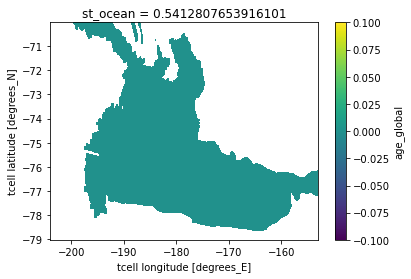

In [83]:
sbins = np.arange(32,35.5, 0.01)
tbins = np.arange(-2, 2.5, 0.01)
ds = section.where(section.ht<2000).mean('time')
plt.rc('text', usetex=False)
ds.isel(st_ocean = 0).age_global.plot()


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'interpolation'
  from ipykernel import kernelapp as app


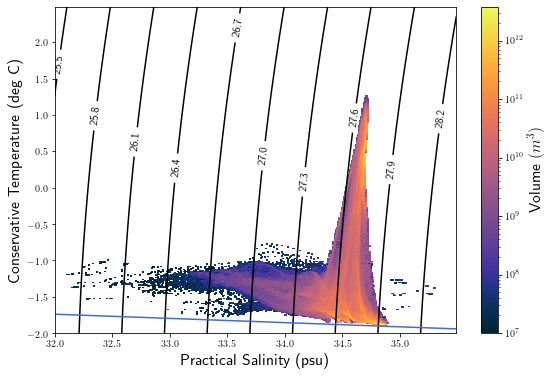

In [86]:
plt.rc('text', usetex=True)

from matplotlib import ticker, cm, colors
dVol = ds.volume
hTS = histogram(ds.salt, ds.temp-273.15, bins=[sbins, tbins], weights=dVol)
gig = plt.figure(figsize = (9,6))

CS = (hTS.T).plot(cmap = 'cmo.thermal', add_colorbar = False, norm=colors.LogNorm(vmin = 10**7))
cbar = plt.colorbar(CS)
cbar.set_label('Volume $(m^3)$', fontsize = 16)
temp_mesh,salt_mesh = np.meshgrid(tbins,sbins)
density = gsw.density.sigma0(salt_mesh,temp_mesh)#potential density
freezing = gsw.CT_freezing(sbins,10.1325,0)  #freezing line
plt.plot(sbins, freezing, color = 'royalblue')
contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
plt.clabel(contours, inline=True, fontsize=11, fmt='%1.1f')
plt.ylabel('Conservative Temperature (deg C)', fontsize = 16)
plt.xlabel('Practical Salinity (psu)', fontsize = 16)
#plt.savefig('RosscomparisontoOrsiWiedherwohlmean')

I expanded the above code to split the transect into small sections and construct a T-S plot for each section, and plot them all on one figure. I then do this for all times.

In [8]:
Months = np.array(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


##SHELF##

ds = section
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188.5)
ds = ds.where(ds1 < 95)
ds = ds.where(ds.ht > 800)
mask_ocean1 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land1 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI SHELF
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y < -71).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
#ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 500)
ds = ds.where(np.sqrt((ds.x+190)**2+(ds.y+72)**2)>1)
mask_ocean2 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land2 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  


#DRYGALSKI CONNECTION
ds = section
ds = ds.where(ds.z > ds.ht-100)
ds1 = ds.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > 1+0.4*ds.x).where(ds.y < 4+0.4*ds.x).where(ds.y >-72.5).where(ds.y <-69).where(ds.x < -186.5)# where(ds.y < - 0.1*ds.x -92.8)
ds = ds.where(ds1<50)
ds = ds.where(ds.ht > 450)
ds = ds.where(ds.x >-187.8)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean3 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land3 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

#DRYGALSKI EXTENSION
ds = section
ds = ds.where(ds.y < -68).where(ds.y>-69.75).where(ds.x>-190).where(ds.x<-187)
#ds.age_global.isel(time=0).mean('st_ocean').plot()
mask_ocean4 = 2 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isfinite(ds.salt.isel(time=0).mean('st_ocean'))  
mask_land4 = 1 * np.ones((ds.dims['yt_ocean'], ds.dims['xt_ocean'])) * np.isnan(ds.salt.isel(time=0).mean('st_ocean'))  

mask_array = mask_ocean1 + mask_land1 +mask_ocean2 + mask_land2 +mask_ocean3 + mask_land3 +mask_ocean4 + mask_land4
ds2 = section
ds2 = ds2.where(mask_array > 4).where(ds1<50).where(ds2.y < -72)
ds2 = ds2.assign(distance = lambda ds2 :-ds2.dzt*(np.sqrt(((ds2.xt_ocean + 173)*10*(5556.065+ds2.dxt)/2)**2+((ds2.yt_ocean+60)*10*(5556.065+ds2.dyt)/2)**2))/ds2.dzt+877194)#.load()

dsa = ds2.where(ds2.distance < -350000)#.where(ds2.z > ds2.ht-200)
dsb = ds2.where(ds2.distance > -350000).where(ds2.distance < -250000)#.where(ds2.z > ds2.ht-200)
dsc = ds2.where(ds2.distance > -250000).where(ds2.distance < -150000)#.where(ds2.z > ds2.ht-200)
dsd = ds2.where(ds2.distance > -150000).where(ds2.distance < -50000)#.where(ds2.z > ds2.ht-200)
dse = ds2.where(ds2.distance > -50000).where(ds2.distance < 0)#.where(ds2.z > ds2.ht-200)


##EXTENSION##
ds4 = section
ds4 = ds4.where(ds4.y < -68).where(ds4.y>-69.75).where(ds4.x>-189).where(ds4.x<-187)
#ds = ds.assign(distance = lambda ds :ds.dzt*(np.sqrt((ds.xt_ocean + 200)**2+(ds.yt_ocean+98)**2))/ds.dzt)#.load()
ds4 = ds4.assign(distance = lambda ds4 :-ds4.dzt*(np.sqrt(((ds4.xt_ocean + 188)*10*(5556.065+ds4.dxt)/2)**2+((ds4.yt_ocean+60)*10*(5556.065+ds4.dyt)/2)**2))/ds4.dzt+615325+8200-51396)#.load()
dsh = ds4.where(ds4.distance > 80000).where(ds4.distance < 150000)#.where(ds4.z > ds4.ht-200)
dsi = ds4.where(ds4.distance > 150000)#.where(ds4.z > ds4.ht-200)


##BATHYMETRY BIT##
ds = section#.isel(time = 0)
ds1 = ds.where(ds.z > ds.ht-100)
ds1 = ds1.age_global.isel(time = 0).mean('st_ocean')
ds = ds.where(ds.y > -72).where(ds.y < -69.5).where(ds.x < -186 ).where(ds.x > -188)
ds = ds.where(ds1 < 90)
ds = ds.where(ds.ht > 700)
ds = ds.assign(distance = lambda ds :-ds.dzt*(np.sqrt(((ds.xt_ocean + 188)*10*(5556.065+ds.dxt)/2)**2+((ds.yt_ocean+60)*10*(5556.065+ds.dyt)/2)**2))/ds.dzt+615325)#.load()
dsf = ds.where(ds.distance > 0).where(ds.distance < 30000)#.where(ds.z > ds.ht-200)
dsg = ds.where(ds.distance > 30000).where(ds.distance < 80000)#.where(ds.z > ds.ht-200)




/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return fun

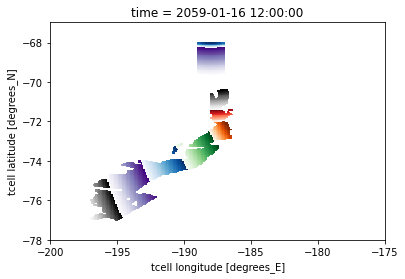

In [19]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
dsa.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[0], add_colorbar = False)
dsb.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[1], add_colorbar = False )
dsc.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[2], add_colorbar = False )
dsd.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[3], add_colorbar = False )
dse.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[4], add_colorbar = False )
dsf.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[5], add_colorbar = False )
dsg.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[0], add_colorbar = False )
dsh.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[1], add_colorbar = False )
dsi.distance.isel(time = 0).mean('st_ocean').plot(cmap =cmaps[2], add_colorbar = False )


## Time series of T-S plot for the above regions:

In [17]:
plt.rc('text', usetex=True)

sbins = np.arange(33.5,35, 0.01)
tbins = np.arange(-2, 2, 0.01)
temp_mesh,salt_mesh = np.meshgrid(tbins,sbins)
density = gsw.density.sigma0(salt_mesh,temp_mesh)
freezing = gsw.CT_freezing(sbins,10.1325,0)
data_DSW = [[0,0,0,0,0,0,0,0,0]]
data_Full = [[0,0,0,0,0,0,0,0,0]]
for i in np.arange(0,12,1):
    data_DSW_i = []
    data_Full_i = []
    fig = plt.figure(figsize=(16,10))
    plt.title('Drygalski Volume Weighted (log scale) T-S Diagram for bottom 200m '+Months[i], fontsize = 18, y = 1)

    ax = fig.add_subplot(3, 3, 1)
    
    trough = dsa.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[0], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_xlim(33.5,35)
    ax.set_title('Region 1')
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')#Pratical Salinity(psu)')
    ax.set_ylabel('Conservative Temperature (deg C)')
    
    ax = fig.add_subplot(3, 3, 2)
    trough = dsb.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[1], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)
    ax.set_title('Region 2')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax = fig.add_subplot(3, 3, 3)
    trough = dsc.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[2], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 3')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax = fig.add_subplot(3, 3, 4)
    trough = dsd.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[3], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 4')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')
    ax.set_ylabel('Conservative Temperature (degrees C)')

    ax = fig.add_subplot(3, 3, 5)
    trough = dse.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[4], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 5')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')#Pratical Salinity(psu)')
    ax.set_ylabel('')#Conservative Temperature (degrees C)')    
    
    ax = fig.add_subplot(3, 3, 6)
    trough = dsf.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[5], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 6')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('')#Pratical Salinity(psu)')
    ax.set_ylabel('')#Conservative Temperature (degrees C)')   
    
    ax = fig.add_subplot(3, 3, 7)
    trough = dsg.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[0], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 7')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('Pratical Salinity(psu)')
    ax.set_ylabel('Conservative Temperature (degrees C)')   
    
    ax = fig.add_subplot(3, 3, 8)
    trough = dsh.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[1], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 8')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('Pratical Salinity(psu)')
    ax.set_ylabel('')#Conservative Temperature (degrees C)')   
    
    ax = fig.add_subplot(3, 3, 9)
    trough = dsi.isel(time =i)
#     da_pressure = xr.DataArray(gsw.p_from_z(-trough.z, trough.y), dims=[ 'st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})

#     da_saltabs = xr.DataArray(gsw.SA_from_SP(trough.salt, da_pressure, trough.x, trough.y), dims=['st_ocean','yt_ocean','xt_ocean'],
#                            coords={
#                                    'st_ocean': trough.st_ocean,
#                                    'yt_ocean': trough.yt_ocean,
#                                    'xt_ocean': trough.xt_ocean})
    dVol = trough.volume
    hTS = histogram(trough.salt, trough.temp1, bins=[sbins, tbins], weights=dVol)
    np.log10(hTS.T).plot(cmap=cmaps[2], add_colorbar = False)
    ax.plot(sbins, freezing)
    contours = plt.contour(salt_mesh, temp_mesh, density, 10, colors='k',interpolation='none')
    ax.clabel(contours, inline=True, fontsize=8)

    ax.set_title('Region 9')
    ax.set_xlim(33.5,35)
  
    hTS1 = hTS.where(hTS.salt_bin > 34.8).where(hTS.temp1_bin<-1.7)
    total_DSW_ij = np.nansum(hTS1)
    total_Full_ij = np.nansum(hTS)
    data_DSW_i = np.append(data_DSW_i, [total_DSW_ij])
    data_Full_i = np.append(data_Full_i, [total_Full_ij])
    ax.set_xlabel('Pratical Salinity(psu)')
    ax.set_ylabel('')#Conservative Temperature (degrees C)')       
    
    data_DSW = np.append(data_DSW,[data_DSW_i], axis = 0 )
    data_Full = np.append(data_Full,[data_Full_i], axis = 0 )
    print(data_DSW)

    #(29,37)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    fig.savefig('drygalskinewtransect_T-S_monthly_volume'+str(i)+'.png')
    fig.clf()
print('DSW:')
print(data_DSW)
print('Full:')
print(data_Full)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log10
  return func(*(_execute_task(a, cache) for a in args))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by cont

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.36238535e+12 8.61472238e+12 3.32828013e+12 2.14014690e+12
  4.69537574e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.02076539e+12 8.53140504e+12 3.30616101e+12 2.29599958e+12
  4.60893125e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.51736299e+12 8.12618905e+12 3.11813580e+12 2.38110105e+12
  6.52413549e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.04514277e+12 7.68430807e+12 3.00858333e+12 2.02505636e+12
  5.94436657e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.76651268e+12 7.25304149e+12 2.74471891e+12 1.75868797e+12
  4.52232562e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.57886623e+12 7.00200283e+12 2.58843525e+12 1.55644933e+12
  4.06607403e+11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.53

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

See https://sites.google.com/view/antarcticadswproject2020/ for examples of that T-S plot. By summing the values of the T-S arrays corresponding to newly formed DSW (temperature <-1.7 degrees, salinity > 34.8), we can create a timeseries of the volume of DSW in that characteristic. These didn't make the final report but are interesting nonetheless.

In [25]:
data_DSW1=data_DSW
data_Full1=data_Full

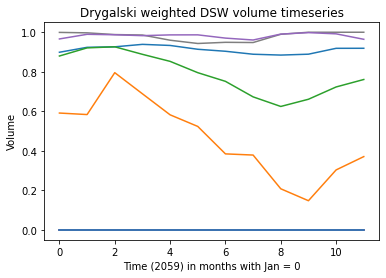

In [26]:
x = data_DSW1
y = data_Full1
timeseries = np.arange(0,12,1)
section0 = []
for j in np.arange(0,12,1):
    section0=section0+[x[j+1,0]]
section0 =section0/y[1,0]

section1 = []
for j in np.arange(0,12,1):
    section1=section1+[x[j+1,1]]
section1 =section1/y[1,1]
    
section2 = []
for j in np.arange(0,12,1):
    section2=section2+[x[j+1,2]]
section2 =section2/y[1,2]
section3 = []
for j in np.arange(0,12,1):
    section3=section3+[x[j+1,3]]
section3 =section3/y[1,3]
section4 = []
for j in np.arange(0,12,1):
    section4=section4+[x[j+1,4]]
section4 =section4/y[1,4]
section5 = []
for j in np.arange(0,12,1):
    section5=section5+[x[j+1,5]]
section5 =section5/y[1,5]    
section6 = []
for j in np.arange(0,12,1):
    section6=section6+[x[j+1,6]]
section6 =section6/y[1,6]    
section7 = []
for j in np.arange(0,12,1):
    section7=section7+[x[j+1,7]]
section7 =section7/y[1,7]   
section8 = []
for j in np.arange(0,12,1):
    section8=section8+[x[j+1,8]]
section8 =section8/y[1,8]  
plt.plot(timeseries,section0, color='tab:gray')
plt.plot(timeseries,section1, color='tab:purple')
plt.plot(timeseries,section2, color='tab:blue')
plt.plot(timeseries,section3, color='tab:green')
plt.plot(timeseries,section4, color='tab:orange')
plt.plot(timeseries,section5, color='tab:red')
plt.plot(timeseries,section6, color='tab:gray')
plt.plot(timeseries,section7, color='tab:purple')
plt.plot(timeseries,section8, color='tab:blue')
plt.xlabel('Time (2059) in months with Jan = 0')
plt.ylabel('Volume')
plt.title('Drygalski weighted DSW volume timeseries')
plt.savefig('drygalskiDSWtimeseries')